<h2 align="center"> Titanic Survival Prediction Case Study </h2>

### Importing Libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from warnings import filterwarnings
filterwarnings('ignore')

### Loading Dataset

In [97]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **Target variable is Survived which is Binary Categorical**

### Checking shape of dataset

In [98]:
df.shape

(889, 12)

### Checking Null Values 

In [99]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Filling Missing Values

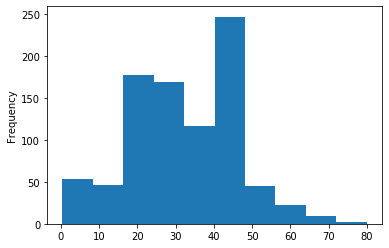

In [91]:
df['Age'].plot.hist()

* as Curve is Bell Shaped , so fill the missing values by Mean

In [92]:
df['Age'].fillna(df['Age'].mean(), inplace= True)

* Embarked column is categorical so calculating the mode and filling it 

In [93]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

* We observe that max people are from S-southampton so we fill all with S

In [94]:
df["Embarked"].fillna(value='S',inplace=True)

* Now checking missing values

In [101]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

* All missing values are filled now , 

## Droping Irrelevent columns 

* As the name column contain different name and the survival is not relevant to names
* passenger Id does not make any sense
* Ticket number doesnt provide any relevant information whether they survived or not so drop it

In [102]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [103]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


*  Now data only conatin relevant columns

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


### Changing Text data to Categorical 

* Label Encoding it encode the value as per given instance
- Eg- columns has 3 category C/S/Q--it will form label
    suppose 0-C, 1-S, 2-Q

In [105]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df["Sex"] = lab.fit_transform(df["Sex"])
df["Embarked"] = lab.fit_transform(df["Embarked"])

In [106]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Catplot

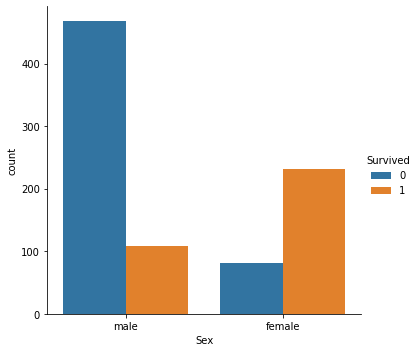

In [107]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = eda)

### Inference:
Just by observing the graph, it can be approximated that: 
* The survival rate of men is around 20% and that of women is around 75%. 

Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

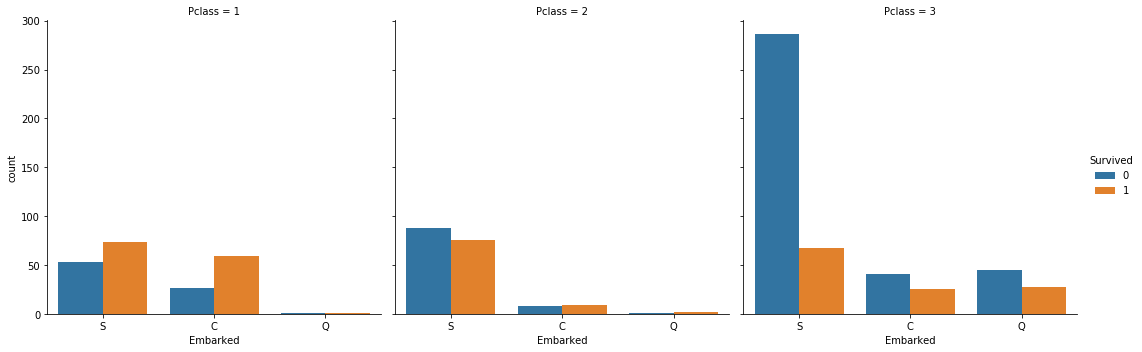

In [108]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data =eda) 

### Heatmap

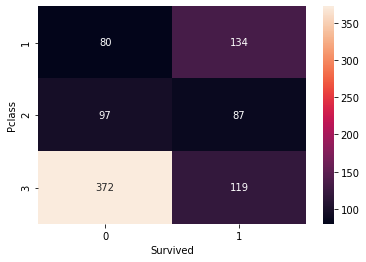

In [109]:
# Group the dataset by Pclass and Survived and then unstack them 

group = eda.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 

# Heatmap - Color encoded 2D representation of data. 

sns.heatmap(pclass_survived, annot = True, fmt ="d") 

### Inference
It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. 
* Class 1 passengers have a higher survival chance compared to classes 2 and 3. 

It implies that Pclass contributes a lot to a passenger’s survival rate.

## Spliting Data into Dependent Variable and Independent variable

In [110]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [111]:
y = df.iloc[:,:1]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [112]:
X = df.drop(["Survived"],axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


# Train the model using Decision Tree

In [113]:
model = tree.DecisionTreeClassifier(max_depth=14)

In [114]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Predicting Score 

In [115]:
model.score(X,y)

0.96962879640045

## Applying Random Forest 

In [116]:
rf = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [117]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

### Checking Score 

In [118]:
rf.oob_score_

0.8042744656917885

### Finding Most Relevent Column for predicting Person Survived or not

In [119]:
a = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
for feature,imp in zip(a, rf.feature_importances_):
    print(feature,"\t :",imp);

Pclass 	 : 0.08984775552907895
Sex 	 : 0.2618108850077556
Age 	 : 0.25576675136868515
SibSp 	 : 0.04994011222807715
Parch 	 : 0.03993581510330175
Fare 	 : 0.2672778336198752
Embarked 	 : 0.03542084714322597


### Inference:
* Pclass, Sex , Age, Fare have value more than 0.05 ie, They are Important feature and affect the prediction of Survived Persons

In [120]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Spliting Dataset according to Important Columns

In [121]:
x = df[['Age', 'Sex', 'Fare','Pclass']]
x.head()

,Age,Sex,Fare,Pclass
0,22.0,1,7.2500,3
1,38.0,0,71.2833,1
2,26.0,0,7.9250,3
3,35.0,0,53.1000,1
4,35.0,1,8.0500,3


In [122]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Fitting Decision Tree

In [123]:
model = tree.DecisionTreeClassifier(max_depth=8)
model.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Creating Tree

In [124]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display 

In [125]:
with open('dt2.dot','w') as f:
    f = tree.export_graphviz(model, feature_names=['Age', 'Sex', 'Fare','Pclass'], out_file=f);

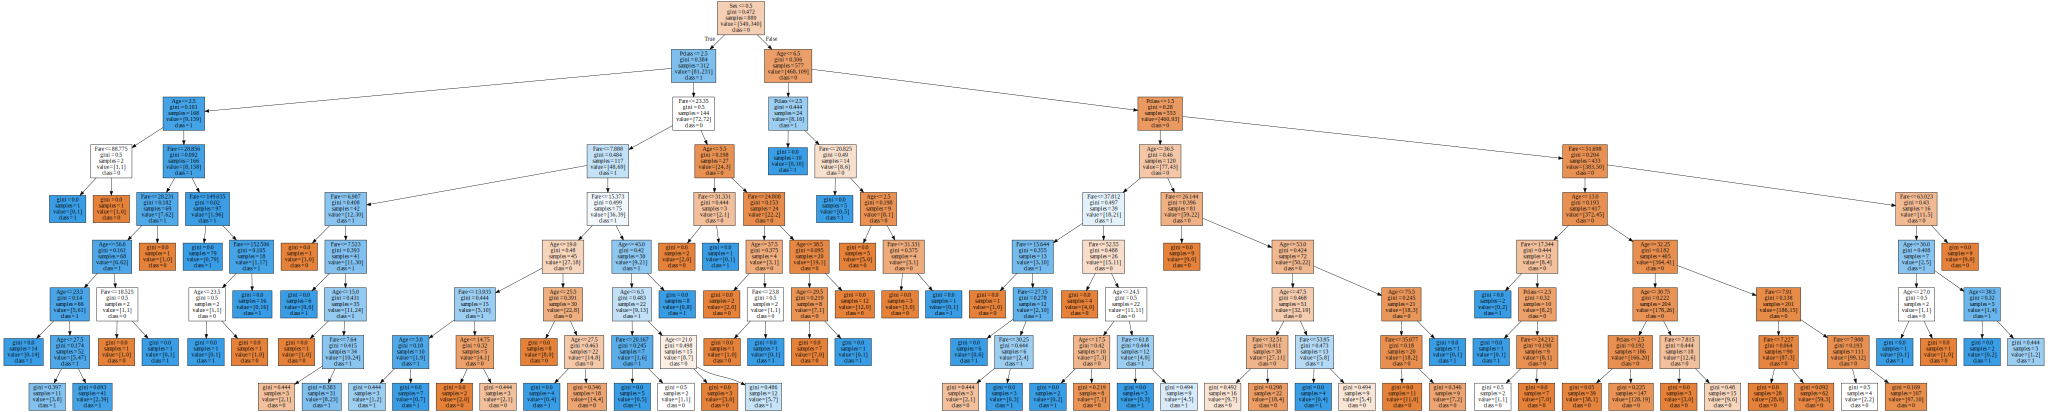

In [126]:
graph = Source(tree.export_graphviz(model, out_file=None, feature_names=['Age', 'Sex', 'Fare','Pclass'],
                                    class_names=['0','1'] , filled = True))
display(SVG(graph.pipe(format='svg')))

### Predicting Score

In [127]:
model.score(x,y)

0.8965129358830146

## Fitting Random Forest

In [128]:
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

### Accuracy Score 

In [129]:
rf.oob_score_

0.8233970753655793

## Conclusion: 
* The Accuracy score increases while predicting on Important Columns than predicting on All Columns

<hr>

## Prediction on  Test DataSet

In [134]:
test_data = pd.read_csv('test.csv')

In [135]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


## Cleaning test data

In [136]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Droping Irrelevent columns 

In [138]:
df2 = test_data.drop(['Name','PassengerId','Ticket',],axis=1)

In [139]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### Filling Null Values 

In [140]:
df2['Age'].fillna(df2['Age'].mean(), inplace=True)
df2['Fare'].fillna(df2['Fare'].mean(), inplace=True)

### Converting Text Variables

In [141]:
le = LabelEncoder()

df2["Sex"] = le.fit_transform(df2["Sex"])
df2["Embarked"] = le.fit_transform(df2["Embarked"])

In [142]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


## Prediction on Test DataSet

In [143]:
imp = df2[['Age', 'Sex', 'Fare','Pclass']]
imp.head()

,Age,Sex,Fare,Pclass
0,34.5,1,7.8292,3
1,47.0,0,7.0000,3
2,62.0,1,9.6875,2
3,27.0,1,8.6625,3
4,22.0,0,12.2875,3


In [144]:
y_pred = model.predict(imp)

In [145]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

### Stroting Result into DataFrame

In [146]:
result = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred })

In [147]:
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
412,1305,0
413,1306,1
414,1307,0
415,1308,0


### Converting Dataframe to CSV File

In [148]:
result.to_csv('TitanicPrediction.csv', index=False)

### Loading predicted Output

In [149]:
output = pd.read_csv('TitanicPrediction.csv')
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
